In [1]:
# Data wrangling
import pandas as pd
import numpy as np

# for Visulization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")

# data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.metrics import accuracy_score

#Dataset masuk
df2 = pd.read_csv('./laptops_test.csv')
df1 = pd.read_csv('./laptop_data.csv')


#cek bentuk data
print("df1 shape : ", df1.shape)
print("df2 shape : ", df2.shape)

df1 shape :  (1303, 12)
df2 shape :  (325, 13)


In [2]:
df1

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [3]:
df2

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,HP,15-bs053od (i7-7500U/6GB/1TB/W10),Notebook,"15.6""",1366x768,Intel Core i7 7500U 2.7GHz,6GB,1TB HDD,Intel HD Graphics 620,Windows,10,2.04kg,5148468.0
1,Asus,Rog GL753VE-DS74,Gaming,"17.3""",Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows,10,2.99kg,15552108.0
2,Dell,Inspiron 7579,2 in 1 Convertible,"15.6""",IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,12GB,512GB SSD,Intel HD Graphics 620,Windows,10,2.19kg,11550708.0
3,Toshiba,Portege Z30-C-1CV,Notebook,"13.3""",Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows,7,1.2kg,10625940.0
4,Lenovo,IdeaPad 320-15ABR,Notebook,"15.6""",Full HD 1920x1080,AMD A12-Series 9720P 3.6GHz,6GB,256GB SSD,AMD Radeon 530,Windows,10,2.2kg,4881708.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,"14.0""",IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows,10,1.8kg,5673096.0
321,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,"13.3""",IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows,10,1.3kg,13329108.0
322,Lenovo,IdeaPad 100S-14IBR,Notebook,"14.0""",1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows,10,1.5kg,2036268.0
323,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,"15.6""",1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows,10,2.19kg,6793488.0


In [4]:
# Ganti nama fitur "Manufactur" -> "Company"
df2 = df2.rename(columns={'Manufacturer' : 'Company'})

# Ganti nama fitur "Category" -> "TypeName"
df2 = df2.rename(columns={'Category' : 'TypeName'})

# Ganti nama fitur CPU" -> "Cpu"
df2 = df2.rename(columns={"CPU": "Cpu"})

# Ganti nama fitur "RAM" -> "Ram"
df2 = df2.rename(columns={"RAM": "Ram"})

# Ganti nama fitur "Storage" -> "Memory"
df2 = df2.rename(columns={"Storage": "Memory"})

# Ganti nama fitur "GPU" -> "Gpu "
df2 = df2.rename(columns={"GPU": "Gpu "})

In [5]:
#Gabungin Buat Identitas Laptop
df1['Nama'] = df1.apply(lambda row: row['Company'] + " " + row['TypeName'] + " " + row['Cpu']+ " " + row['Ram'] , axis = 1)
df1 = df1.drop(['Company', 'Cpu', 'Ram'], axis = 1)

#Gabungin Buat Identitas Laptop
df2['Nama'] = df2.apply(lambda row: row['Company'] + " " + row['TypeName'] + " " + row['Cpu']+ " " + row['Ram'] , axis = 1)
df2 = df2.drop(['Company', 'Cpu', 'Ram'], axis = 1)
df2['Price'] = df2['Price'] / 100 

In [6]:
#Labeling TypeName
from sklearn.preprocessing import LabelEncoder

type_le = LabelEncoder()
df1['TypeName'] = type_le.fit_transform(df1['TypeName'].values)
print(df1['TypeName'])

df2['TypeName'] = type_le.fit_transform(df2['TypeName'].values)
print(df2['TypeName'])

# Label Encoder index
# 0 = 2 in 1 convertible
# 1 = Gaming
# 2 = Netbook
# 3 = Notebook
# 4 = Ultrabook

0       4
1       4
2       3
3       4
4       4
       ..
1298    0
1299    0
1300    3
1301    3
1302    3
Name: TypeName, Length: 1303, dtype: int32
0      3
1      1
2      0
3      3
4      3
      ..
320    0
321    0
322    3
323    3
324    3
Name: TypeName, Length: 325, dtype: int32


In [7]:
df1 = df1[['Nama', 'TypeName', 'Price']]
df2 = df2[['Nama', 'TypeName', 'Price']]

In [8]:
df0 = pd.concat([df1, df2], ignore_index=True)

In [9]:
#Cek null pada data train
print(df0.isnull().sum(), "\n")

Nama        0
TypeName    0
Price       0
dtype: int64 



In [10]:
#Cek data duplikat
print(df0.duplicated().sum())

73


In [11]:
#Karena Nama Berpengaruh pada program
# Hapus data duplikat berdasarkan kolom "nama"
df0 = df0.drop_duplicates()

In [12]:
df0

,Nama,TypeName,Price
0,Apple Ultrabook Intel Core i5 2.3GHz 8GB,4,71378.6832
1,Apple Ultrabook Intel Core i5 1.8GHz 8GB,4,47895.5232
2,HP Notebook Intel Core i5 7200U 2.5GHz 8GB,3,30636.0000
3,Apple Ultrabook Intel Core i7 2.7GHz 16GB,4,135195.3360
4,Apple Ultrabook Intel Core i5 3.1GHz 8GB,4,96095.8080
...,...,...,...
1594,Asus Notebook Intel Core i7 6500U 2.5GHz 4GB,3,64050.8544
1595,Lenovo 2 in 1 Convertible Intel Core i7 6500U ...,0,56730.9600
1596,Lenovo 2 in 1 Convertible Intel Core i7 6500U ...,0,133291.0800
1597,Lenovo Notebook Intel Celeron Dual Core N3050 ...,3,20362.6800


In [13]:
# Tes lagi apakah Nama sudah tidak duplikat
nama_kolom_duplikat = []

for i in range(len(df0.columns)):
    if df0[df0.columns[i]].value_counts().max() > 1:
        nama_kolom_duplikat.append(df0.columns[i])

print(nama_kolom_duplikat)

['Nama', 'TypeName', 'Price']


In [14]:
#Price Process
#INR to IDR
df0['Price'] = df0['Price'] * 188.31 

#Redominasi
df0['Price'] = df0['Price'] / 1000000

#Deskripsi nilai Price
print("Price : ", df0['Price'].describe())

Price :  count    1555.000000
mean       12.919441
std         8.615240
min         1.745769
25%         6.611850
50%        10.926108
75%        17.246777
max        66.559488
Name: Price, dtype: float64


In [61]:
#Input Prediktor
X = df0[['TypeName', 'Price']]
y = df0['Nama']

X1 = [[0, 25.100043]]
Xz = df0[['TypeName']]
df0

,Nama,TypeName,Price
0,Apple Ultrabook Intel Core i5 2.3GHz 8GB,4,13.441320
1,Apple Ultrabook Intel Core i5 1.8GHz 8GB,4,9.019206
2,HP Notebook Intel Core i5 7200U 2.5GHz 8GB,3,5.769065
3,Apple Ultrabook Intel Core i7 2.7GHz 16GB,4,25.458634
4,Apple Ultrabook Intel Core i5 3.1GHz 8GB,4,18.095802
...,...,...,...
1594,Asus Notebook Intel Core i7 6500U 2.5GHz 4GB,3,12.061416
1595,Lenovo 2 in 1 Convertible Intel Core i7 6500U ...,0,10.683007
1596,Lenovo 2 in 1 Convertible Intel Core i7 6500U ...,0,25.100043
1597,Lenovo Notebook Intel Celeron Dual Core N3050 ...,3,3.834496


In [65]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

In [67]:
y_pred = knn.predict(X)
print(y_pred)

['Apple Ultrabook Intel Core i5 2.3GHz 8GB'
 'Apple Ultrabook Intel Core i5 1.8GHz 8GB'
 'HP Notebook Intel Core i5 7200U 2.5GHz 8GB' ...
 'Lenovo 2 in 1 Convertible Intel Core i7 6500U 2.5GHz 16GB'
 'Lenovo Notebook Intel Celeron Dual Core N3050 1.6GHz 2GB'
 'HP Notebook Intel Core i7 6500U 2.5GHz 6GB']


In [68]:
accuracy = accuracy_score(y, y_pred)
print(accuracy)

0.7884244372990353


In [69]:
#Exp

df0[df0['TypeName'] == 2]


,Nama,TypeName,Price
20,Asus Netbook Intel Atom x5-Z8350 1.44GHz 2GB,2,1.925363
376,Lenovo Netbook Intel Celeron Quad Core N3450 1...,2,5.548336
430,Samsung Netbook Intel Celeron Dual Core N3060 ...,2,2.698919
461,Acer Netbook Intel Celeron Dual Core N3060 1.6...,2,4.364423
500,Asus Netbook Intel Celeron Dual Core N3350 1.1...,2,3.411273
504,Lenovo Netbook Intel Celeron Dual Core N3060 1...,2,2.658787
515,Asus Netbook Intel Celeron Dual Core N3350 1.1...,2,2.458123
584,Dell Netbook Intel Celeron Dual Core N3060 1.6...,2,2.959781
695,Acer Netbook Intel Celeron Dual Core N3050 1.6...,2,2.698919
750,Lenovo Netbook Intel Celeron Dual Core N3060 1...,2,4.765749


C:\Users\ragil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ragil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ragil\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


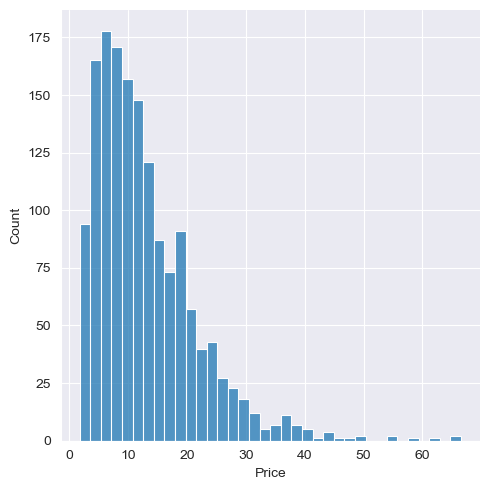

In [70]:
sns.displot(df0['Price'])

C:\Users\ragil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ragil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ragil\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


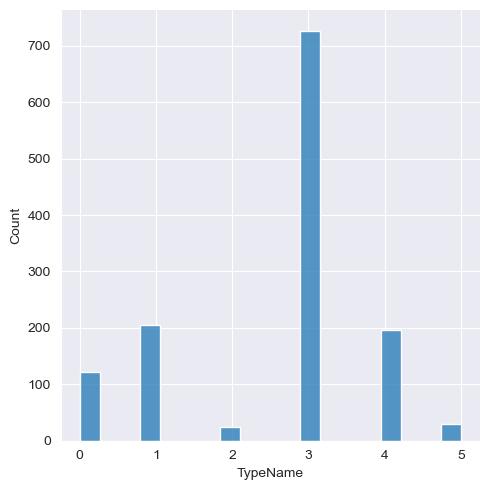

In [71]:
sns.displot(df1['TypeName'])

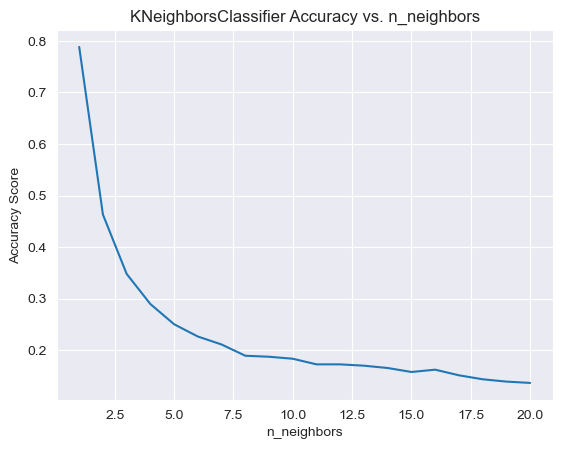

In [80]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Assuming you have your data in X and y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a list of n_neighbors values
n_neighbors_list = range(1, 21)

# Create a list to store accuracy scores
accuracy_scores = []

# Train and evaluate the KNN model for each n_neighbors value
for n_neighbors in n_neighbors_list:
    # Create a KNN classifier instance
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)

    # Train the model
    knn.fit(X, y)

    # Predict the labels for the test data
    y_pred = knn.predict(X)

    # Calculate the accuracy score
    accuracy = accuracy_score(y, y_pred)

    # Append the accuracy score to the list
    accuracy_scores.append(accuracy)

# Plot the accuracy scores vs. n_neighbors
plt.plot(n_neighbors_list, accuracy_scores)
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy Score')
plt.title('KNeighborsClassifier Accuracy vs. n_neighbors')
plt.show()
